In [1]:
import jax
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from lib.mmd import target_value_and_grad_riesz
from lib.gd_images import wasserstein_gradient_descent_save
from lib.datasets import get_dataset

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_imgs(imgs, tgt_dataset="CIFAR10", save=False):
    """
        imgs: ndarray of shape (n_traj, n_classes, n, d)
    """

    n_traj, n_class, n, d = imgs.shape
    
    fig, axes = plt.subplots(n_class, n_traj, figsize=(9, 4.5))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    if tgt_dataset == "CIFAR10":
        mean = [0.4914, 0.4822, 0.4465]
        std = [0.2023, 0.1994, 0.2010]

        imgs = np.array(imgs.reshape(n_traj, n_class, n, 3, 32, 32))

        for k in range(3):
            imgs[:,:,:,k] = imgs[:,:,:,k] * std[k] + mean[k]
            
        imgs = np.clip(np.transpose(imgs, (0, 1, 2, 4, 5, 3)), 0, 1)
    elif tgt_dataset in ["MNIST", "FMNIST"]:
        imgs = imgs.reshape(n_traj, n_class, n, 28, 28)

    for i in range(n_class):
        for j in range(n_traj):
            if tgt_dataset in ["MNIST", "FMNIST"]:
                axes[i, j].imshow(imgs[j, i, 0], "gray")
            else:
                axes[i, j].imshow(imgs[j, i, 0])
            
            axes[i, j].axis('off')

    if save:
        plt.savefig("./trajectories_noise_to_" + tgt_dataset + ".pdf", format="pdf")
    
    plt.show()

# MNIST

## With Momentum

In [11]:
rng = jax.random.PRNGKey(0)
master_key, key = jax.random.split(rng)

n_data_by_class = 200
tgt_dataset = "MNIST"
path_data = "~/torch_datasets"

lr = 1
n_epochs = 18000 # 10000 # 200000
m = 0.9

master_key, key_src, key_tgt, key_wgd = jax.random.split(master_key, num=4)

X_data_src = jax.random.normal(key_src, (10, n_data_by_class, 28*28))
X_data_tgt, y_tgt, X_test, y_test = get_dataset(key_tgt, tgt_dataset, n_data_by_class, path_data)

target_grad = lambda x, y, key: target_value_and_grad_riesz(x, y, key, n_sample_batch=n_data_by_class)
L_loss, L_xk = wasserstein_gradient_descent_save(X_data_src, X_data_tgt, target_grad, key_wgd, lr=lr, m=m, n_epochs=n_epochs, save_interval=n_epochs//15)

Running for 18,000 iterations: 100%|██████████| 18000/18000 [02:36<00:00, 114.85it/s]


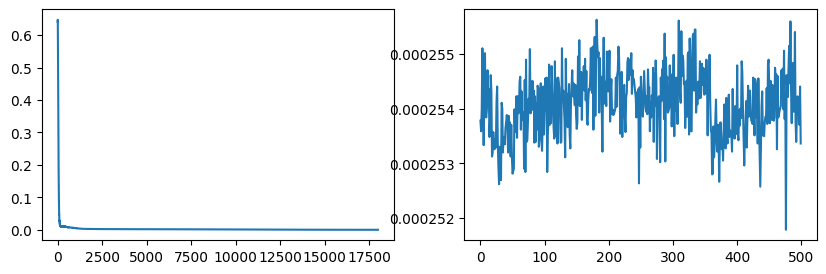

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(L_loss)
ax[1].plot(L_loss[-500:])
plt.show()

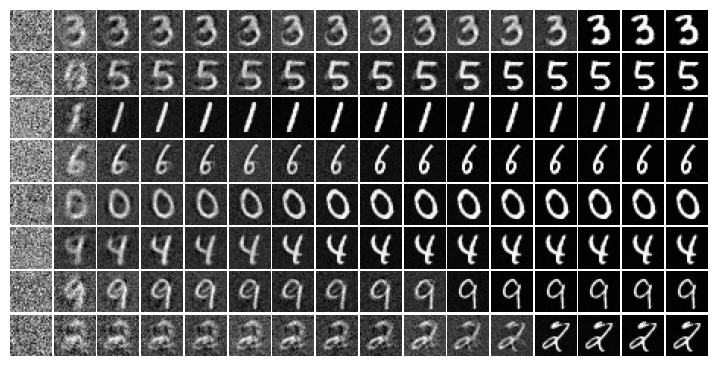

In [14]:
plot_imgs(L_xk[:,:8], tgt_dataset="MNIST") #, save=True)

## Without Momentum

In [29]:
rng = jax.random.PRNGKey(0)
master_key, key = jax.random.split(rng)

n_data_by_class = 200
tgt_dataset = "MNIST"
path_data = "~/torch_datasets"

lr = 1
n_epochs = 100000 # 10000 # 200000
m = 0

master_key, key_src, key_tgt, key_wgd = jax.random.split(master_key, num=4)

X_data_src = jax.random.normal(key_src, (10, n_data_by_class, 28*28))
X_data_tgt, y_tgt, X_test, y_test = get_dataset(key_tgt, tgt_dataset, n_data_by_class, path_data)

target_grad = lambda x, y, key: target_value_and_grad_riesz(x, y, key, n_sample_batch=n_data_by_class)
L_loss, L_xk = wasserstein_gradient_descent_save(X_data_src, X_data_tgt, target_grad, key_wgd, lr=lr, m=m, n_epochs=n_epochs, save_interval=n_epochs//15)

Running for 100,000 iterations: 100%|██████████| 100000/100000 [14:33<00:00, 114.50it/s]


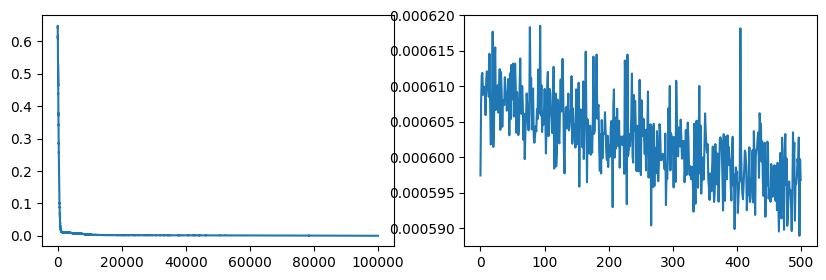

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(L_loss)
ax[1].plot(L_loss[-500:])
plt.show()

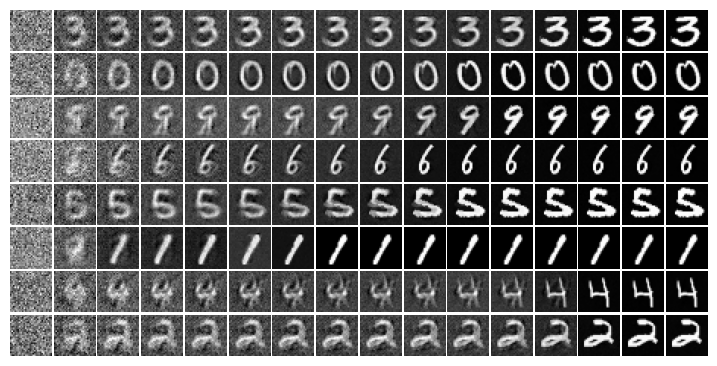

In [33]:
plot_imgs(L_xk[:,:8], tgt_dataset="MNIST", save=True)

# CIFAR10

## With Momentum

In [21]:
rng = jax.random.PRNGKey(0)
master_key, key = jax.random.split(rng)

n_data_by_class = 50
# src_dataset = "MNIST"
tgt_dataset = "CIFAR10"
path_data = "~/torch_datasets"

lr = 1
n_epochs = 150000 # 10000 # 200000
m = 0.9

master_key, key_src, key_tgt, key_wgd = jax.random.split(master_key, num=4)

X_data_src = jax.random.normal(key_src, (10, n_data_by_class, 3*32*32))
X_data_tgt, y_tgt, X_test, y_test = get_dataset(key_tgt, tgt_dataset, n_data_by_class, path_data)

target_grad = lambda x, y, key: target_value_and_grad_riesz(x, y, key, n_sample_batch=n_data_by_class)
L_loss, L_xk = wasserstein_gradient_descent_save(X_data_src, X_data_tgt, target_grad, key_wgd, lr=lr, m=m, n_epochs=n_epochs, save_interval=n_epochs//15)

Files already downloaded and verified
Files already downloaded and verified


Running for 150,000 iterations: 100%|██████████| 150000/150000 [15:21<00:00, 162.76it/s]


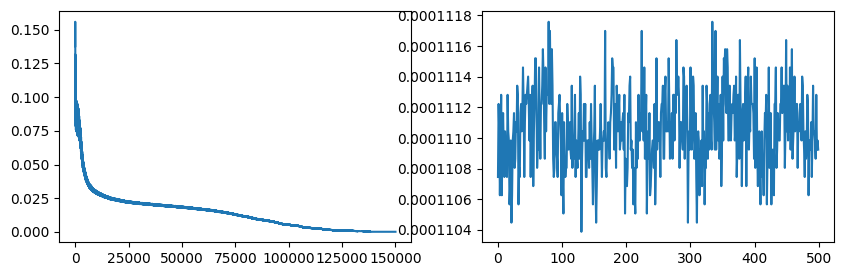

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(L_loss)
ax[1].plot(L_loss[-500:])
plt.show()

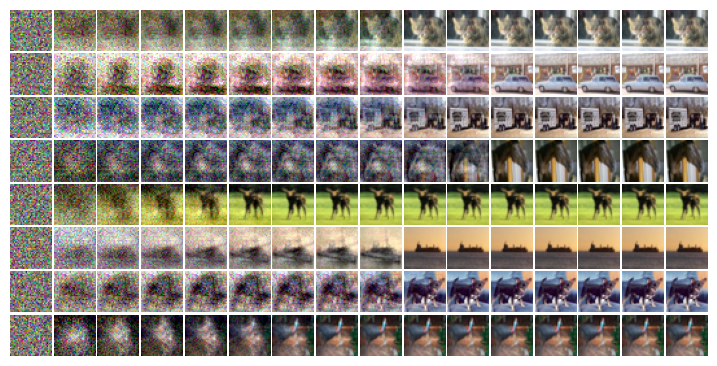

In [36]:
plot_imgs(L_xk[:,:8]) #, save=True)

## Without Momentum

In [39]:
rng = jax.random.PRNGKey(0)
master_key, key = jax.random.split(rng)

n_data_by_class = 50
# src_dataset = "MNIST"
tgt_dataset = "CIFAR10"
path_data = "~/torch_datasets"

lr = 1
n_epochs = 150000 # 10000 # 200000
m = 0

master_key, key_src, key_tgt, key_wgd = jax.random.split(master_key, num=4)

X_data_src = jax.random.normal(key_src, (10, 50, 3*32*32))
X_data_tgt, y_tgt, X_test, y_test = get_dataset(key_tgt, tgt_dataset, n_data_by_class, path_data)

target_grad = lambda x, y, key: target_value_and_grad_riesz(x, y, key, n_sample_batch=n_data_by_class)
L_loss, L_xk = wasserstein_gradient_descent_save(X_data_src, X_data_tgt, target_grad, key_wgd, lr=lr, m=m, n_epochs=n_epochs, save_interval=n_epochs//15)

Files already downloaded and verified
Files already downloaded and verified


Running for 150,000 iterations: 100%|██████████| 150000/150000 [15:17<00:00, 163.42it/s]


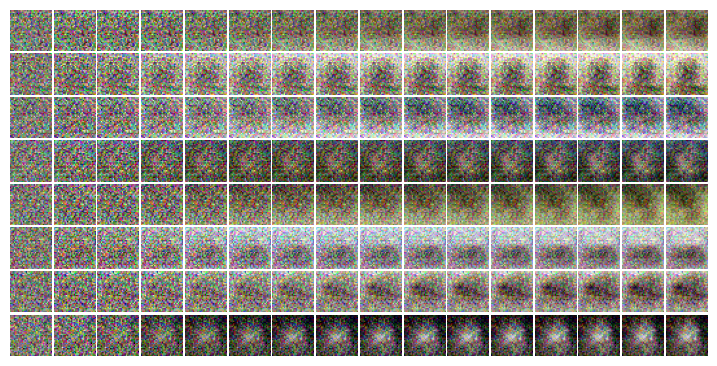

In [40]:
plot_imgs(L_xk[:,:8]) #, save=True)